In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import DarkNews as dn

# Our module
import nuflux

Circular accelerator at rest; should have no flux

In [3]:
#(R = 10 km = 10 000 m = 1 000 000 cm)
mudecay_atrest = nuflux.fluxMC.MuonDecay()

df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 0.1,  #maximum momentum
                            beam_p0 = 0, # average momentum (GeV)
                            beam_dpop = 0, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )

#I use Zbeam length to be 1000 times the circumference; this number has no value but I am using it as a base estimate for the length after which there would probably be no more decays at all.
_= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=1000*np.pi * 2 * 1e6, # Length of beam cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm
                            Racc = 1e6,
                            circular = True)
_ = mudecay_atrest.flux_in_detector(circular = True)

Detector acceptance: 0.0  for nue, and 0.0 for numu.
No flux in the detector


Circular accelerator with 1 TeV max energy and 380 GeV average energy (arbitrary); should output some acceptance

In [4]:
mudecay_beam = nuflux.fluxMC.MuonDecay()

df = mudecay_beam.simulate_decays(
                            pmin = 0,
                            pmax = 3e3,
                            beam_p0 = 1e3,
                            beam_dpop = 0.1,
                            Rpm=0.5,
                            NINT=10,
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
_ = mudecay_beam.propagate_to_detector(
                            ZBEAMEND=250e2, # cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2],# cm
                            truncate_exp = False
                            )
_ = mudecay_beam.flux_in_detector()

Detector acceptance: 0.00045705750032191066  for nue, and 0.00046692122521475426 for numu.


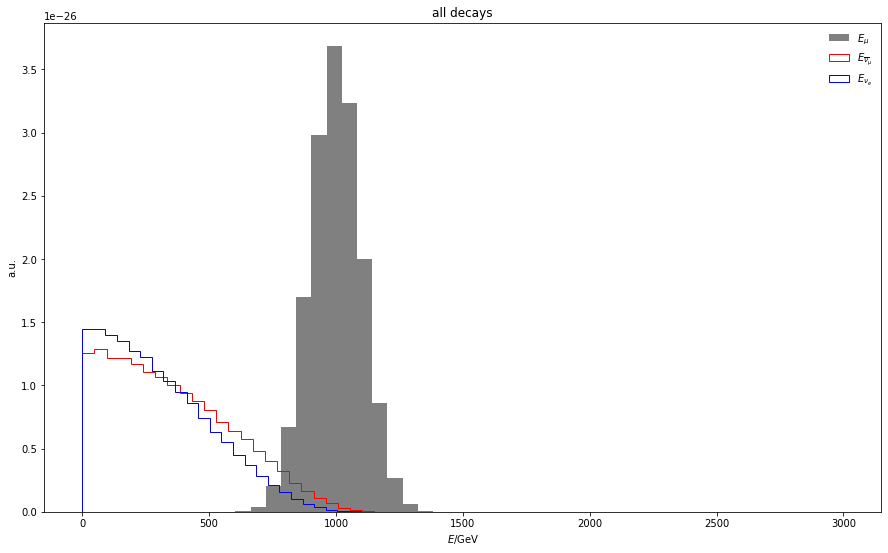

In [102]:
fig, ax = plt.subplots(figsize=(15,9))
fsize=12
n_bins = 50
ax.hist(mudecay_beam.Emu, weights=mudecay_beam.w, bins=n_bins, label=r'$E_\mu$',color='grey', histtype='stepfilled')
ax.hist(mudecay_beam.Enumu, weights=mudecay_beam.w, bins=n_bins, label=r'$E_{\overline{\nu}_\mu}$',color='red', histtype='step')
ax.hist(mudecay_beam.Enue, weights=mudecay_beam.w, bins=n_bins, label=r'$E_{\nu_e}$',color='blue', histtype='step')

plt.legend(frameon=False,loc='upper right')
#ax.set_xlim(0,10)
ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'all decays',fontsize=fsize)

fig.savefig('plots/true_flux.png', dpi=300, bbox_inches='tight')

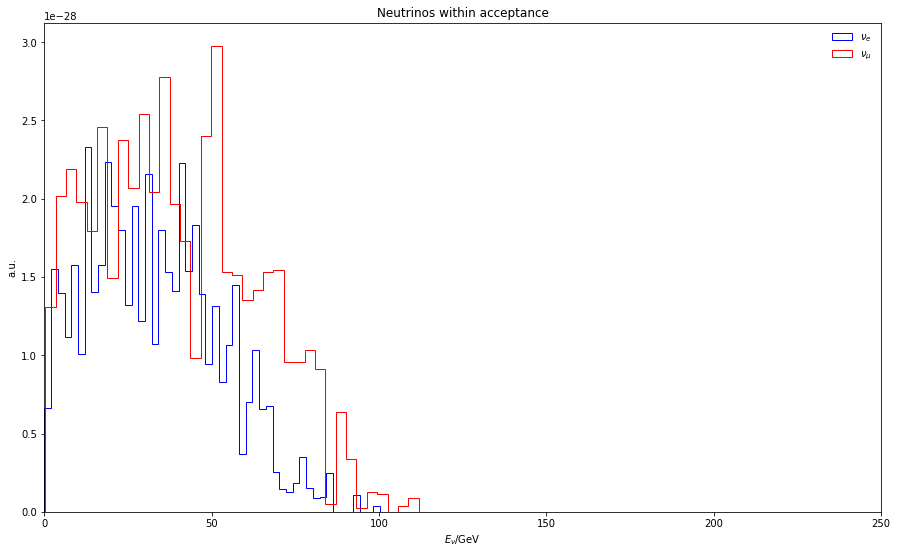

In [19]:
fig, ax = plt.subplots(figsize=(15,9))
fsize=12
n_bins = 50
ax.hist(mudecay_beam.Enue[mudecay_beam.mask_nue], weights=mudecay_beam.w[mudecay_beam.mask_nue], bins=n_bins, label=r'$\nu_e$',color='blue', histtype='step')
ax.hist(mudecay_beam.Enumu[mudecay_beam.mask_numu], weights=mudecay_beam.w[mudecay_beam.mask_numu], bins=n_bins, label=r'$\nu_\mu$',color='red', histtype='step')

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,250)
ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$E_{\nu}/$GeV')

ax.set_title(r'Neutrinos within acceptance',fontsize=fsize)

fig.savefig('plots/nu_fluxes.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '$L_{\\rm lin} = 3$~m, $A_{\\rm det} = 9$~m**2 truncate = True')

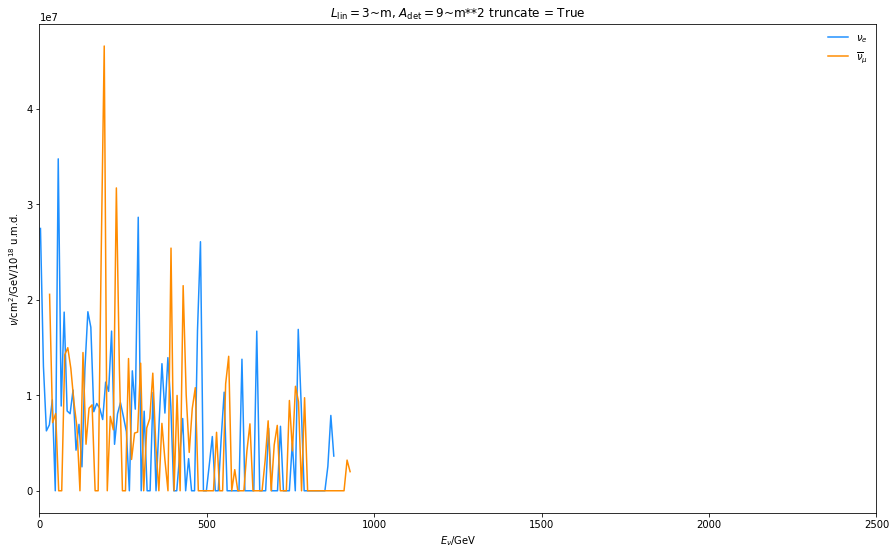

In [35]:
fig, ax = plt.subplots(figsize=(15,9))
fsize=12
ax.plot(mudecay_beam.Enue_ND,mudecay_beam.flux_nue_ND,label=r'$\nu_e$',color='dodgerblue')
ax.plot(mudecay_beam.Enumu_ND,mudecay_beam.flux_numu_ND,label=r'$\overline{\nu}_\mu$',color='darkorange')

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,2500)
ax.set_ylabel(r'$\nu$/cm$^2$/GeV/$10^{18}$ u.m.d.')
ax.set_xlabel(r'$E_{\nu}/$GeV')

ax.set_title(r'$L_{\rm lin} = 3$~m, $A_{\rm det} = 9$~m**2 truncate = True',fontsize=fsize)

In [42]:
#Circular detector (R = 10 km = 10 000 m = 1 000 000 cm) with 1 TeV max energy and 380 GeV average energy (arbitrary); shoudl output some acceptance
mudecay_beam = nuflux.fluxMC.MuonDecay()

df = mudecay_beam.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 10,  #maximum momentum
                            beam_p0 = 3.8, # average momentum (GeV)
                            beam_dpop = 0.1,# little beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )

#I use Zbeam length to be 1000 times the circumference; this number has no value but I am using it as a base estimate for the length after which there would probably be no more decays at all.
_= mudecay_beam.propagate_to_detector(
                            Racc = 1e6,
                            circular = True, 
                            Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
_ = mudecay_beam.flux_in_detector(circular = True)

Detector acceptance: 0.0013103458919353531  for nue, and 0.0013101439977702847 for numu.


Text(0.5, 1.0, 'all decays p0= 3.8 GeV')

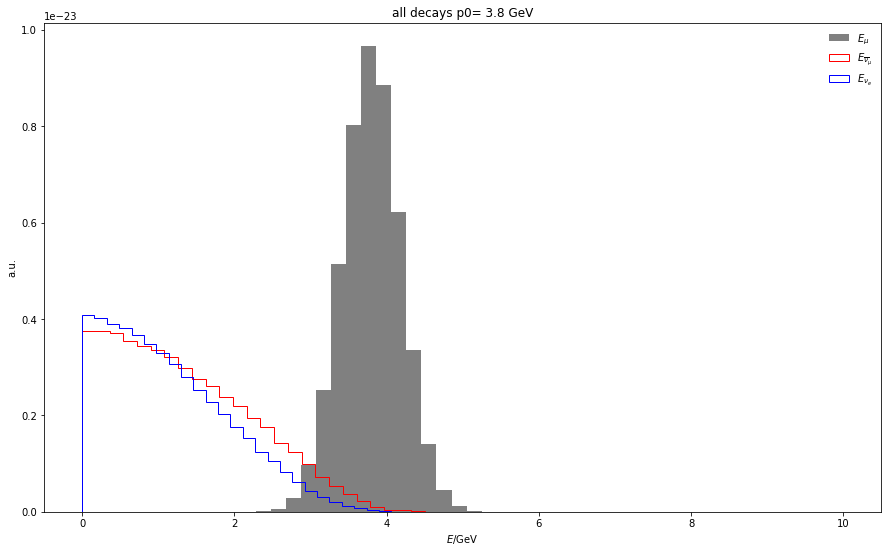

In [44]:
fig, ax = plt.subplots(figsize=(15,9))
fsize=12
n_bins = 50
ax.hist(mudecay_beam.Emu, weights=mudecay_beam.w, bins=n_bins, label=r'$E_\mu$',color='grey', histtype='stepfilled')
ax.hist(mudecay_beam.Enumu, weights=mudecay_beam.w, bins=n_bins, label=r'$E_{\overline{\nu}_\mu}$',color='red', histtype='step')
ax.hist(mudecay_beam.Enue, weights=mudecay_beam.w, bins=n_bins, label=r'$E_{\nu_e}$',color='blue', histtype='step')

plt.legend(frameon=False,loc='upper right')
#ax.set_xlim(0,10)
ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'all decays p0= 3.8 GeV',fontsize=fsize)

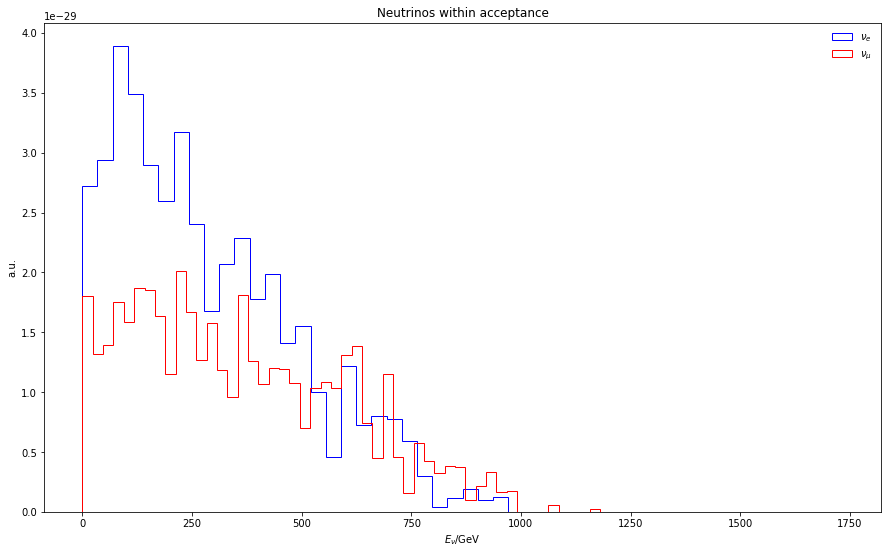

In [99]:
fig, ax = plt.subplots(figsize=(15,9))
fsize=12
n_bins = 50
ax.hist(mudecay_beam.Enue[mudecay_beam.mask_nue], weights=mudecay_beam.w[mudecay_beam.mask_nue], bins=n_bins, label=r'$\nu_e$',color='blue', histtype='step')
ax.hist(mudecay_beam.Enumu[mudecay_beam.mask_numu], weights=mudecay_beam.w[mudecay_beam.mask_numu], bins=n_bins, label=r'$\nu_\mu$',color='red', histtype='step')

ax.legend(frameon=False,loc='upper right')
#ax.set_xlim(0,5)
ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$E_{\nu}/$GeV')

ax.set_title(r'Neutrinos within acceptance',fontsize=fsize)

fig.savefig('plots/nu_fluxes.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, '$R_{\\rm circ} = 1e6$~m, $A_{\\rm det} = 28$~m**2 ')

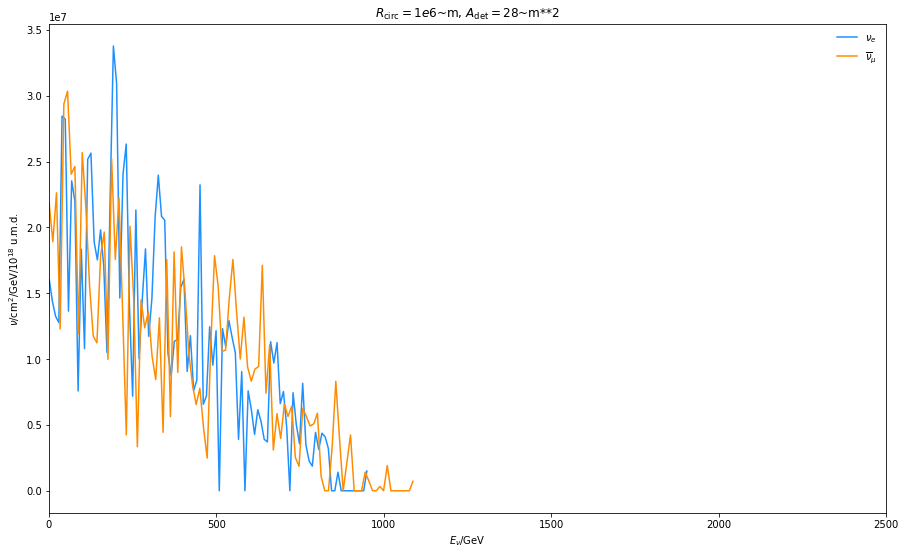

In [37]:
fig, ax = plt.subplots(figsize=(15,9))

ax.hist(mudecay_beam.Enue_ND,mudecay_beam.flux_nue_ND,label=r'$\nu_e$',color='dodgerblue')
ax.hist(mudecay_beam.Enumu_ND,mudecay_beam.flux_numu_ND,label=r'$\overline{\nu}_\mu$',color='darkorange')

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,2500)
ax.set_ylabel(r'$\nu$/cm$^2$/GeV/$10^{18}$ u.m.d.')
ax.set_xlabel(r'$E_{\nu}/$GeV')

ax.set_title(r'$R_{\rm circ} = 1e6$~m, $A_{\rm det} = 28$~m**2 ',fontsize=fsize)
# ax.set_yscale('log'),
# ax.set_ylim(1e9,1e12)
#fig.savefig('plots/nu_fluxes_smooth.png', dpi=300, bbox_inches='tight')

Let's start playing with the different parameters, and see the effects on the acceptance! Notably, we will play with pmax, p0, pmin, ZBEAMEND (to see after how many turns we can stop considering the decays to good estimate; we will also compute the length for decays depending on energy), Racc, Ddetector[0], and Ddetector[1]. 

We will use the duck test to preemptively prove that it works before going to the next sanity checks (if it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck).

PARAMETER 1: pmax

In [43]:
#p0 = 100 GeV
vals1 = [100,200, 400, 600, 800, 1e3, 1.3e3, 1.6e3, 1.8e3, 2e3]
acc1nue =[]
acc1numu=[]
#p0 = 500 GeV
vals2 = [500,600, 1e3, 1.4e3, 1.7e3, 2e3, 2.5e3, 3e3, 3.6e3, 4.3e3, 5e3]
acc2nue =[]
acc2numu=[]
#p0 = 1 TeV
vals3 = [1e3,2e3,3e3, 4e3, 5e3, 6e3, 7e3, 8e3,9e3, 10e3]
acc3=[]
acc3nue=[]
acc3numu=[]
#p0 = 10 TeV
vals4 = [10e3, 11e3, 12e3, 13e3]
acc4nue=[]
acc4numu=[]

for v in vals1:
    mudecay_atrest = nuflux.fluxMC.MuonDecay()

    df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = v,  #maximum momentum
                            beam_p0 = 1e2, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
    _= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=1000*np.pi * 2 * 1e6, # Length of beam cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm - doesn't matter if circ acc
                            Racc = 1e6,
                            circular = True, Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
    a,b = mudecay_atrest.flux_in_detector(circular = True, acceptance = True)
    acc1nue.append(a)
    acc1numu.append(b)

for v in vals2:
    mudecay_atrest = nuflux.fluxMC.MuonDecay()

    df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = v,  #maximum momentum
                            beam_p0 = 5e2, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
    _= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=1000*np.pi * 2 * 1e6, # Length of beam cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm - doesn't matter if circ acc
                            Racc = 1e6,
                            circular = True, Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
    a,b = mudecay_atrest.flux_in_detector(circular = True, acceptance = True)
    acc2nue.append(a)
    acc2numu.append(b)

for v in vals3:
    mudecay_atrest = nuflux.fluxMC.MuonDecay()

    df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = v,  #maximum momentum
                            beam_p0 = 1e3, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
    _= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=1000*np.pi * 2 * 1e6, # Length of beam cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm - doesn't matter if circ acc
                            Racc = 1e6,
                            circular = True, Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
    a,b = mudecay_atrest.flux_in_detector(circular = True, acceptance = True)
    acc3nue.append(a)
    acc3numu.append(b)

for v in vals4:
    mudecay_atrest = nuflux.fluxMC.MuonDecay()

    df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = v,  #maximum momentum
                            beam_p0 = 1e4, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
    _= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=1000*np.pi * 2 * 1e6, # Length of beam cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm - doesn't matter if circ acc
                            Racc = 1e6,
                            circular = True, Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
    a,b = mudecay_atrest.flux_in_detector(circular = True, acceptance = True)
    acc4nue.append(a)
    acc4numu.append(b)



Text(0, 0.5, 'Detector acceptance')

<Figure size 432x288 with 0 Axes>

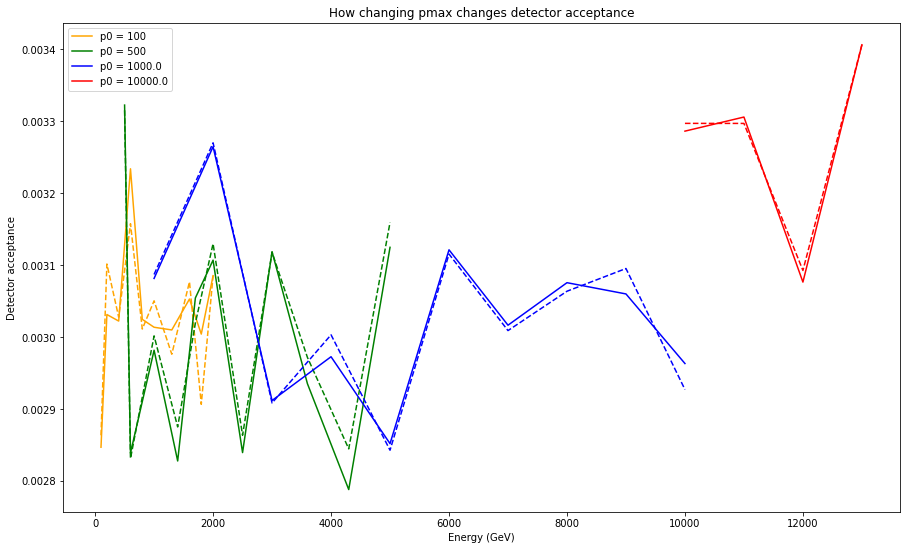

In [44]:
accs =[[acc1nue, acc1numu],[acc2nue, acc2numu], [acc3nue, acc3numu], [acc4nue, acc4numu]]
vals=[vals1, vals2, vals3, vals4]
cols=['orange', 'green', 'blue', 'red']
plt.figure(0)
plt.figure(figsize=(15,9))
for i in range(4):
    plt.plot(vals[i], accs[i][0], c=cols[i], label='p0 = {}'.format(vals[i][0]))
    plt.plot(vals[i], accs[i][1], c=cols[i], linestyle='--')

plt.title("How changing pmax changes detector acceptance")
plt.xlabel("Energy (GeV)")
plt.legend()
plt.ylabel("Detector acceptance")

PARAMETER 2: p0

In [65]:
#pmin = 0 ; pmax = 11 TeV
vals1 = np.logspace(1, 4, 10)
numu =[]
nue=[]
for v in vals1:
    a= []
    b =[]
    for i in range(5):
        mudecay_atrest = nuflux.fluxMC.MuonDecay()

        df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 11e3,  #maximum momentum
                            beam_p0 = v, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
        _= mudecay_atrest.propagate_to_detector(
                            Racc = 1e6,
                            circular = True, 
                            Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
        ap,bp = mudecay_atrest.flux_in_detector(circular = True, acceptance = True)
        a.append(ap)
        b.append(bp)
    nue.append(a)
    numu.append(b)

mean_mu = [np.mean(x) for x in numu]
mean_nue = [np.mean(x) for x in nue]
std_mu = [np.std(x) for x in numu]
std_nue = [np.std(x) for x in nue]

Text(0, 0.5, 'Detector acceptance')

<Figure size 432x288 with 0 Axes>

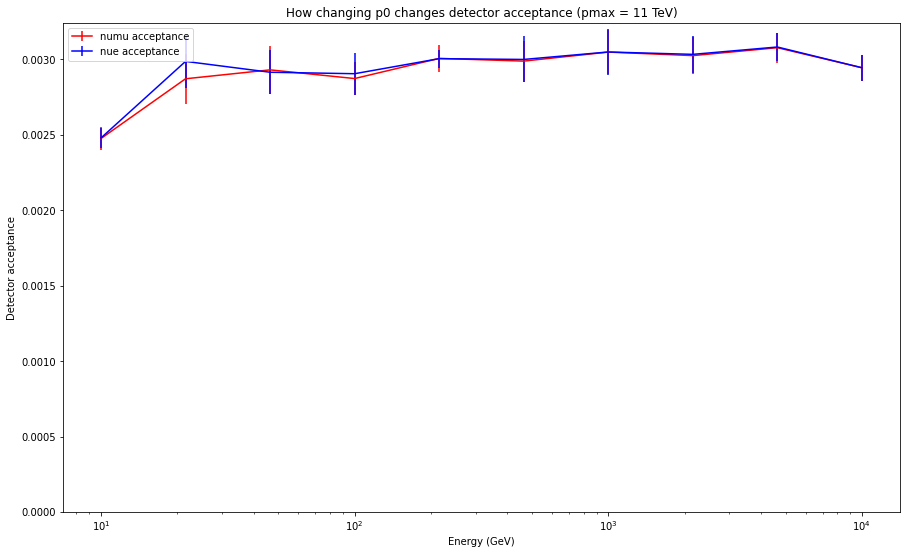

In [66]:
plt.figure(1)
plt.figure(figsize=(15,9))
plt.xscale('log')
plt.errorbar(vals1,mean_mu, yerr = std_mu, c=  'red', label='numu acceptance')
plt.errorbar(vals1, mean_nue, yerr = std_nue, c = 'blue', label='nue acceptance')
plt.ylim(bottom=0)
plt.title("How changing p0 changes detector acceptance (pmax = 11 TeV)")
plt.xlabel("Energy (GeV)")
plt.legend()
plt.ylabel("Detector acceptance")

In [51]:
#pmin = 0 ; pmax = 10 TeV
vals1 = np.logspace(-1, 4, 20)
numu =[]
nue=[]
for v in vals1:
    mudecay_atrest = nuflux.fluxMC.MuonDecay()

    df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 11e3,  #maximum momentum
                            beam_p0 = v, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )
    _= mudecay_atrest.propagate_to_detector(
                            ZBEAMEND=250e2, # cm
                            ZBEAMEXIT=0, # cm
                            R_ND=[0,0,250e2+50e2], # cm
                            circular = False)
    a,b = mudecay_atrest.flux_in_detector(circular = False, acceptance = True)
    nue.append(a)
    numu.append(b)

Text(0, 0.5, 'Detector acceptance')

<Figure size 432x288 with 0 Axes>

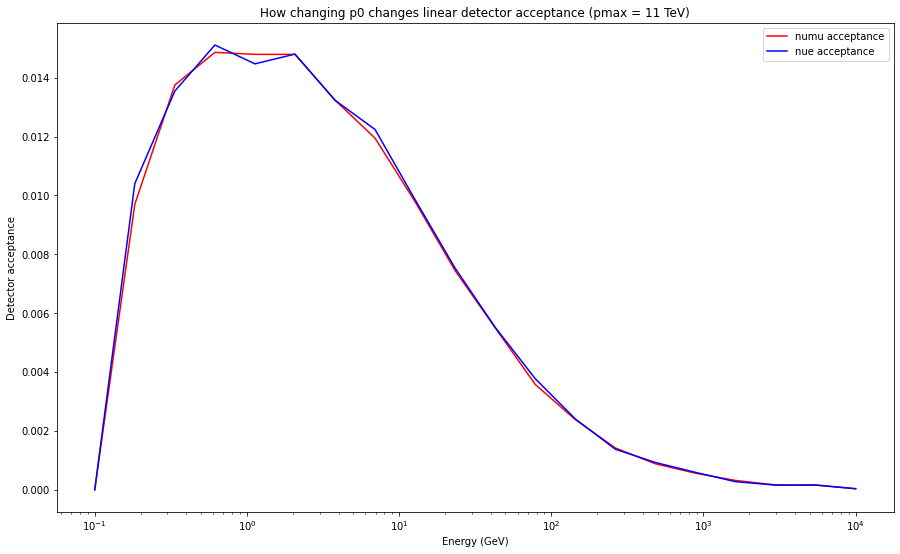

In [52]:
plt.figure(2)
plt.figure(figsize=(15,9))
plt.semilogx(vals1, numu, c='red', label='numu acceptance')
plt.semilogx(vals1, nue, c='blue', label='nue acceptance')

plt.title("How changing p0 changes linear detector acceptance (pmax = 11 TeV)")
plt.xlabel("Energy (GeV)")
plt.legend()
plt.ylabel("Detector acceptance")

Now, let's effectuate some additional tests to make sure that everything is working as it should be. We will look at the cosTheta of each decay (depending on the position; should be somewhat uniform) and the position of each decay (phi). I don't remember what other checks we can do. 

Text(0, 0.5, 'Decays')

<Figure size 432x288 with 0 Axes>

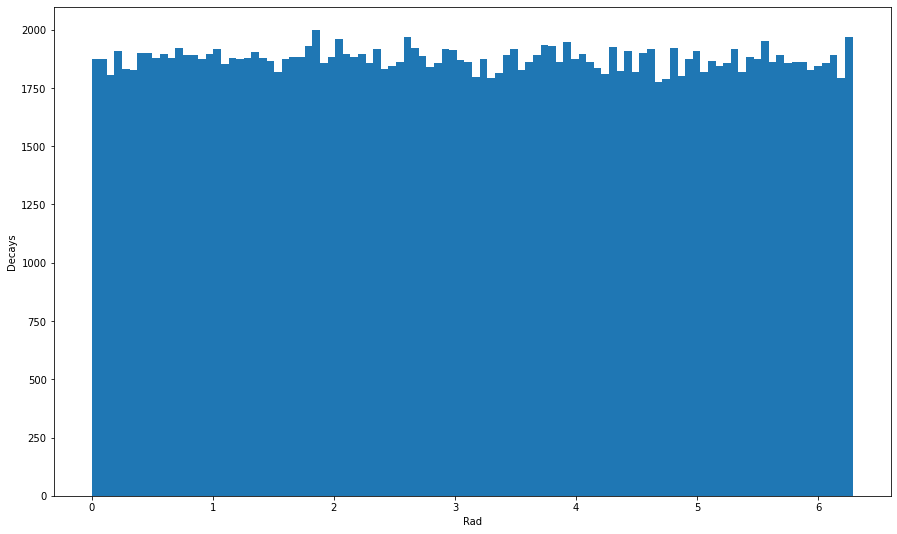

In [53]:
mudecay_atrest = nuflux.fluxMC.MuonDecay()

df = mudecay_atrest.simulate_decays(
                            pmin = 0, #minimum momentum
                            pmax = 1e3,  #maximum momentum
                            beam_p0 = 3.8e2, # average momentum (GeV)
                            beam_dpop = 0.1, # no beam spread
                            Rpm=0.5, #Fraction of total muons that are plus (or minus?)
                            NINT=10, #for MC integration
                            NINT_warmup=10,
                            NEVAL=1e5,
                            NEVAL_warmup=1e4,
                            )

#I use Zbeam length to be 1000 times the circumference; this number has no value but I am using it as a base estimate for the length after which there would probably be no more decays at all.
_= mudecay_atrest.propagate_to_detector(
                            Racc = 1e6,
                            circular = True, 
                            Ddetector =[300, 20]) #arbitrary dimensions for circ detect SHEET at x = 0, y=0, z = Racc ; [0] is radius of detector and [1] is the hollow hole in the middle 
deltas = mudecay_atrest.delta

plt.figure(3)
plt.figure(figsize=(15,9))
plt.hist(deltas, bins=100)
plt.xlabel("Rad")
plt.ylabel("Decays")

#_ = mudecay_atrest.flux_in_detector(circular = True)

In [4]:
import numpy as np
2e12 *(1 - 1/np.e) * 365.25 * 24 * 60 *60 *50

1.9948207747288088e+21

In [7]:
class test:
    def __init__(self, Name, ids):
        self.name = Name
        self.ids = ids

SyntaxError: non-default argument follows default argument (2821884431.py, line 2)

In [17]:
p1 = test()

TypeError: __init__() missing 2 required positional arguments: 'Name' and 'id'

In [15]:
p1.name

'lin'

In [16]:
p1.id

[32, 5435]